<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


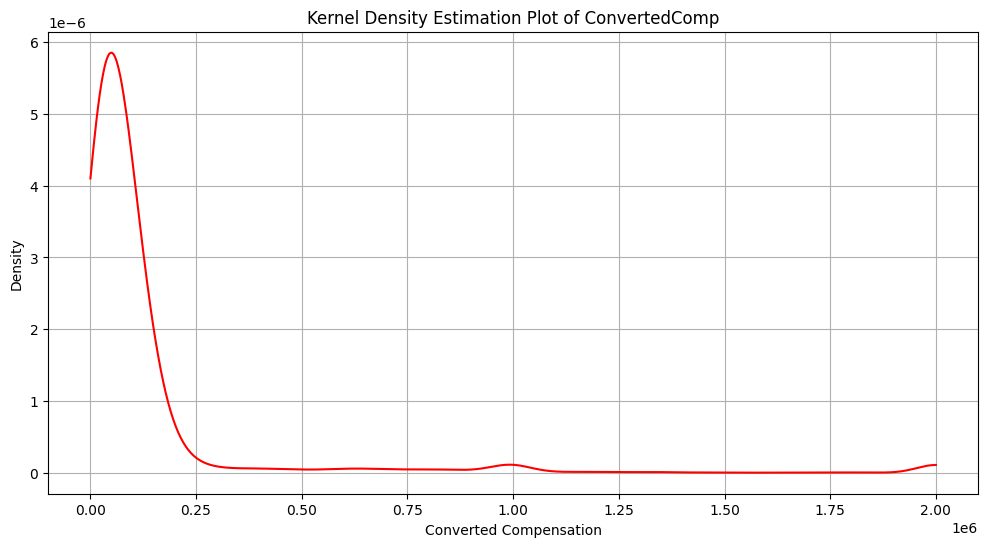

In [9]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# Remove any infinite or NaN values from the 'ConvertedComp' column
df = df[np.isfinite(df['ConvertedComp'])]

# Create a kernel density estimation (KDE) plot for 'ConvertedComp'
compensation_values = df['ConvertedComp'].values
kde = gaussian_kde(compensation_values)
x = np.linspace(min(compensation_values), max(compensation_values), 1000)
plt.figure(figsize=(12, 6))
plt.plot(x, kde(x), color='red')
plt.title('Kernel Density Estimation Plot of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


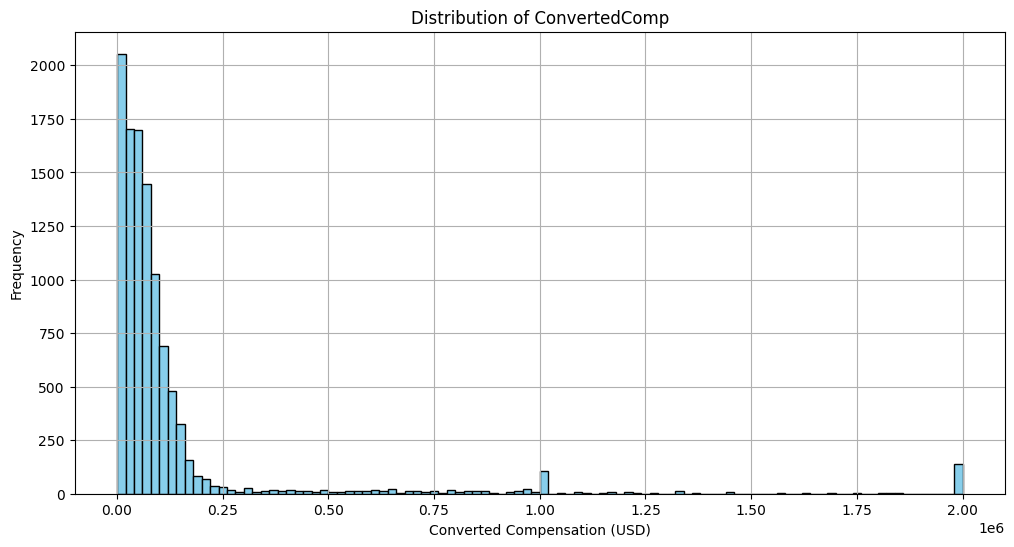

In [10]:
# your code goes here
# Plot the histogram for the 'ConvertedComp' column
plt.figure(figsize=(12, 6))
plt.hist(df['ConvertedComp'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [11]:
# your code goes here
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

# Print the median of the 'ConvertedComp' column
print("Median of ConvertedComp:", median_converted_comp)


Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [12]:
# your code goes here
man_respondents = df[df['Gender'] == 'Man']

# Count the number of respondents who identified themselves only as a man
num_man_respondents = man_respondents.shape[0]

# Print the number of respondents who identified themselves only as a man
print("Number of respondents who identified themselves only as a man:", num_man_respondents)

Number of respondents who identified themselves only as a man: 9725


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# your code goes here

woman_respondents = df[df['Gender'] == 'Woman']

# Calculate the median of the 'ConvertedComp' column for these respondents
median_converted_comp_woman = woman_respondents['ConvertedComp'].median()

# Print the median of the 'ConvertedComp' column for respondents who identified themselves only as a woman
print("Median ConvertedComp of respondents who identified themselves only as a woman:", median_converted_comp_woman)


Median ConvertedComp of respondents who identified themselves only as a woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
# your code goes here

# Calculate the five-number summary for the 'Age' column
age_summary = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

# Extract the required values
min_age = age_summary['min']
q1_age = age_summary['25%']
median_age = age_summary['50%']
q3_age = age_summary['75%']
max_age = age_summary['max']

# Print the five-number summary
print("Five-number summary for the 'Age' column:")
print(f"Minimum: {min_age}")
print(f"First Quartile (Q1): {q1_age}")
print(f"Median: {median_age}")
print(f"Third Quartile (Q3): {q3_age}")
print(f"Maximum: {max_age}")

Five-number summary for the 'Age' column:
Minimum: 16.0
First Quartile (Q1): 25.0
Median: 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


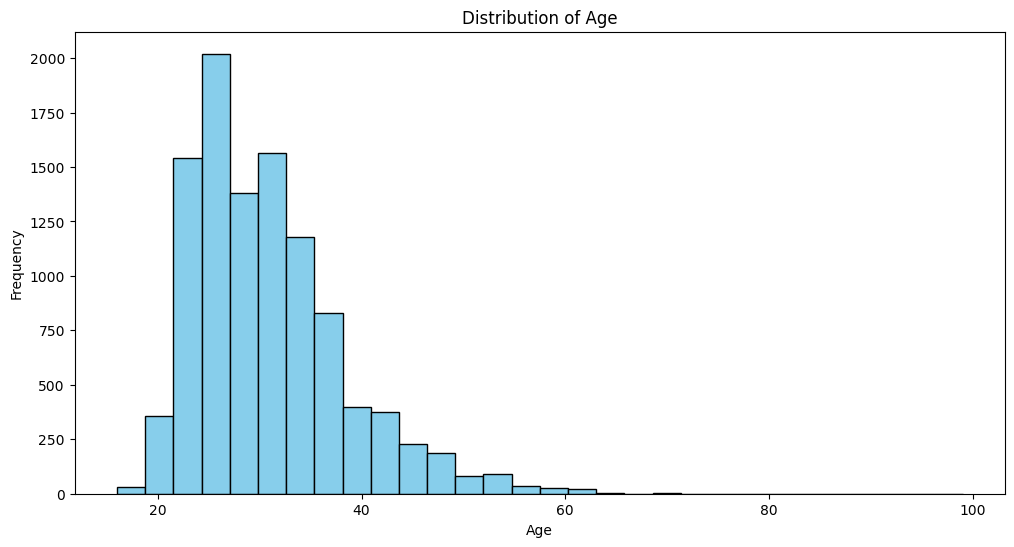

In [17]:
# your code goes here

# Plot the histogram for the 'Age' column
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


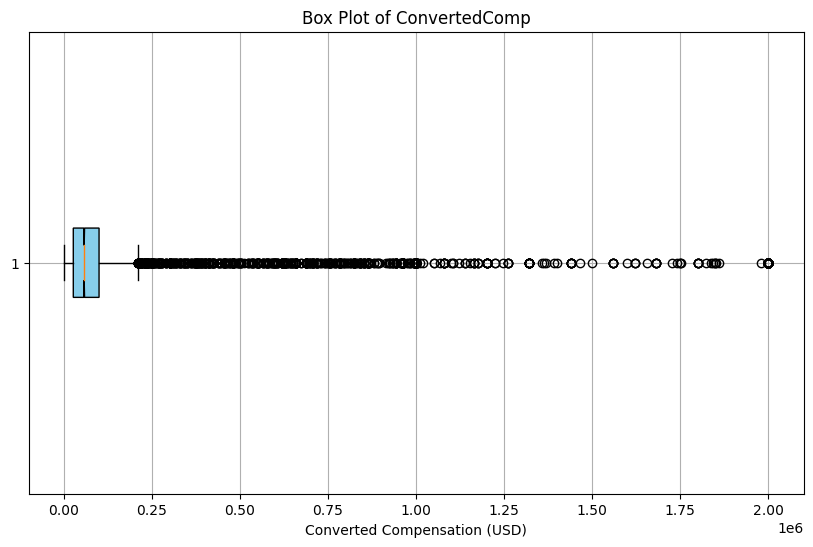

In [18]:
# your code goes here
# Plot the box plot for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'], vert=False, patch_artist=True, notch=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:
# your code goes here
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'ConvertedComp' column
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print Q1, Q3, and IQR
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)

Q1 (25th percentile): 26868.0
Q3 (75th percentile): 100000.0
Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [20]:
# your code goes here
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Print the upper and lower bounds
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 209698.0
Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print("Number of outliers in the 'ConvertedComp' column:", num_outliers)

Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [25]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new dataframe to compare with the original
print("Shape of original dataframe:", df.shape)
print("Shape of new dataframe without outliers:", df_no_outliers.shape)

median_converted_comp_after = df_no_outliers['ConvertedComp'].median()

# Print the median ConvertedComp after removing outliers
print("Median ConvertedComp after removing outliers:", median_converted_comp_after)

mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

# Print the mean ConvertedComp after removing outliers
print("Mean ConvertedComp after removing outliers:", mean_converted_comp_after)


# Calculate Q1 and IQR for the 'Age' column
Q1_age = df['Age'].quantile(0.25)
IQR_age = df['Age'].quantile(0.75) - Q1_age



Shape of original dataframe: (10582, 85)
Shape of new dataframe without outliers: (9703, 85)
Median ConvertedComp after removing outliers: 52704.0
Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:
# your code goes here

age_corr = df.corr()['Age']

# Print the correlation values
print("Correlation between Age and other numerical columns:")
print(age_corr)

<ipython-input-29-14301db3e5c9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  age_corr = df.corr()['Age']


Correlation between Age and other numerical columns:
Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
